In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../dataset.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

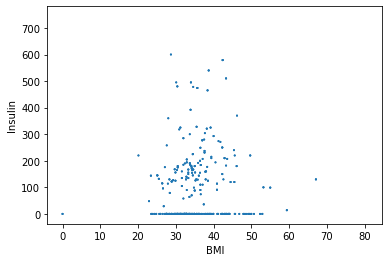

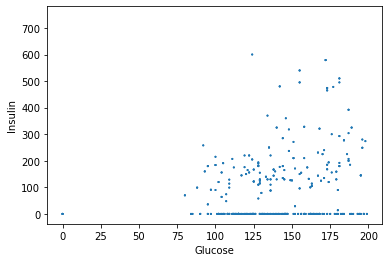

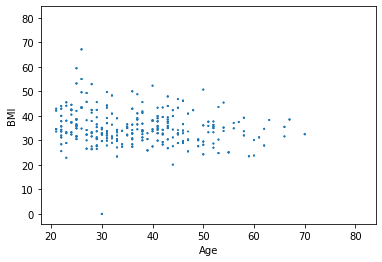

In [4]:
df.plot(kind='scatter', x='BMI', y='Insulin', s=df.Outcome)
df.plot(kind='scatter', x='Glucose', y='Insulin', s=df.Outcome)
df.plot(kind='scatter', x='Age', y='BMI', s=df.Outcome)

In [5]:
def normalize(df):
    df = (df - df.min()) / (df.max() - df.min())
    df = df.round(decimals=2)
    return df

In [6]:
df = normalize(df)

In [7]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         0.12     0.69           0.51           0.32     0.00  0.42   
1         0.00     0.42           0.67           0.28     0.17  0.47   
2         0.00     0.73           0.00           0.00     0.00  0.55   
3         0.00     0.68           0.56           0.38     0.34  0.52   
4         0.06     0.70           0.51           0.37     0.65  0.50   

   DiabetesPedigreeFunction   Age  Outcome  
0                      0.02  0.43      1.0  
1                      0.07  0.03      0.0  
2                      0.24  0.17      1.0  
3                      0.12  0.05      1.0  
4                      0.20  0.00      0.0

In [8]:
import numpy as np
from random import randrange
from math import sqrt

In [9]:
def random_split(dataset, outcome, size=0.3):
    test, outcome_test = [], []
    training, training_outcome = dataset.copy(), outcome.copy()
    
    size = int(size * len(dataset))
    for _ in range(size):
        rindex = randrange(len(training))
        test.append(training[rindex])
        outcome_test.append(training_outcome[rindex])
        
        training = np.delete(training, rindex, 0)
        training_outcome = np.delete(training_outcome, rindex)
        
    return training, training_outcome, test, outcome_test

In [10]:
columns = df.columns
target = 'Outcome'

In [11]:
X = df[[column for column in columns if column != target]].to_numpy()
y = df[target].astype(int).to_numpy()

In [12]:
X_training, y_training, X_test, y_test = random_split(X, y)

In [13]:
def find_distances(dataset, outcome, test):
    result = []
    distance = lambda dataset_row, test_row: np.sqrt(round(np.sum((dataset_row - test_row.T) ** 2), ndigits=2))
    
    for row in test:
        distances = [[distance(dataset_row, row), outcome[i]] for i, dataset_row in enumerate(dataset)]
        result.append(distances)

    return result

In [14]:
def classify(dataset, outcome, test, k):
    
    if k <= 0:
        raise "K must be at least 1!"

    dataset = np.mat(dataset)
    test = np.mat(test)
    
    predicted = []
    distances = find_distances(dataset, outcome, test)
    
    for distance in distances:
        sorted_distances = sorted(distance, key=lambda value: value[0])
        pos = len(list(filter(lambda value: value[1] == 1, sorted_distances[:k])))
        has_diabetes = 1 if pos > (k // 2) else 0
        predicted.append(has_diabetes)
        
    return predicted

In [15]:
predicted = classify(X_training, y_training, X_test, k=5)

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [17]:
fpr, tpr, thresh = roc_curve(y_test, predicted, pos_label=1)
auc_score = roc_auc_score(y_test, predicted)

In [18]:
print(f"Accuracy: {auc_score}")

Accuracy: 0.5020822236211321


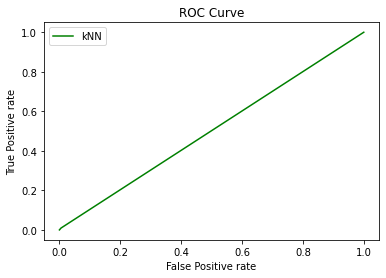

In [19]:
plt.plot(fpr, tpr, color="green", label="kNN")
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc='best')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test, predicted)

array([[384,   2],
       [212,   2]], dtype=int64)